### 【問題1】仮定関数
### 【問題2】最急降下法
### 【問題3】推定
### 【問題4】平均二乗誤差
### 【問題5】目的関数

In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df_base = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
df = df_base.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
feature_names = ["GrLivArea", "YearBuilt"]
# feature_names = ["GrLivArea"]
y_name = "SalePrice"
X = df_base.loc[:, feature_names].values
y = df_base[y_name].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)
lr_mse = mean_absolute_error(y_valid, y_pred)
print("mean_absolute_error", lr_mse)

# print(lr.coef_)
# print(lr.intercept_)
# print(lr.score(X_valid, y_valid))
# X_train = X_train[:4]
# y_train = y_train[:4]

mean_absolute_error 32711.07748550501


In [181]:
class ScratchLinearRegression:

    def __init__(self, iter_num, lr):
        self.iter_num = iter_num
        self.lr = lr
        self.loss = np.array([])       # lossはイテレーション数だけ作られる
        self.loss_valid = np.array([]) # lossはイテレーション数だけ作られる
        self.theta = None              # シータはfitまでわからない

    # 問題6
    def fit(self, X, y, X_valid=None, y_valid=None):
        n_iteration = self.iter_num
        self.theta = np.zeros(X.shape[1]+1) # +1はバイアス分
        dummy_bias = np.ones((X.shape[0], 1))
        X = np.hstack((dummy_bias, X))
        if X_valid is not None:
            dummy_bias = np.ones((X_valid.shape[0], 1))
            X_valid = np.hstack((dummy_bias, X_valid))

        for _ in range(n_iteration):
            y_hat = self._linear_hypothesis(X) # 予測値
            loss = self._gradient_descent(X, y, y_hat)
            self.loss = np.append(self.loss, loss)
            if X_valid is not None:
                diff_list_valid = (X_valid @ self.theta) - y_valid
                loss_valid = self._loss(diff_list_valid, X_valid)
                self.loss_valid = np.append(self.loss_valid, loss_valid)

    # 問題1 線形仮説 現時点での予測値y(1次元配列)の出力
    def _linear_hypothesis(self, X):
        return X @ self.theta

    # 問題2 最急降下法によるパラメータの更新
    def _gradient_descent(self, X, y, y_hat_list):
        diff_list = y_hat_list - y
        gra = diff_list @ X / len(X)
        new_theta = self.theta - self.lr * gra
        self.theta = new_theta
        return self._loss(diff_list, X)

    # 問題3
    def predict(self, X):
        dummy_bias = np.ones((X.shape[0],1))
        X = np.hstack((dummy_bias, X))
        return self._linear_hypothesis(X)

    # 問題4 平均二乗誤差の計算
    def _mse(self, diff, X):
        return np.sum(diff**2) / X.shape[0]

    # 問題5 損失関数
    def _loss(self, diff, X):
        return self._mse(diff, X) / 2

### 【問題6】学習と推定
### 【問題7】学習曲線のプロット

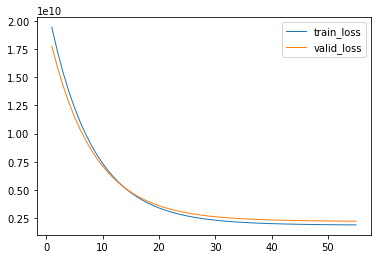

mean_absolute_error 43860.54782679833


In [182]:
slr = ScratchLinearRegression(55, 0.00000001)
slr.fit(X_train, y_train, X_valid, y_valid)

import matplotlib.pyplot as plt
plt.plot(np.arange(1, len(slr.loss)+1), slr.loss, label='train_loss', linewidth=1)
plt.plot(np.arange(1, len(slr.loss_valid)+1), slr.loss_valid, label='valid_loss', linewidth=1)
plt.legend()
plt.show()

y_pred = slr.predict(X_valid)

from sklearn.metrics import mean_absolute_error
lr_mse = mean_absolute_error(y_valid, y_pred)
print("mean_absolute_error", lr_mse)